In [1]:
import os
import pandas as pd
from urllib.parse import urlparse
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
processed_file = 'data/processed_corpus.parquet'

if os.path.exists(processed_file):
    print(f"Loading processed data from {processed_file}...")
    df = pd.read_parquet(processed_file)

Loading processed data from data/processed_corpus.parquet...


In [3]:
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc)

# Count articles per domain
article_counts = df['domain'].value_counts()

print(article_counts)

domain
on.ge                     2981
www.marketer.ge            725
imedinews.ge               623
forbes.ge                  295
ka.martech.zone            289
                          ... 
saertogazeti.ge              1
www.radiodk.ge               1
news.croconet.ge             1
halal-travel.ehalal.io       1
mariaspace.ge                1
Name: count, Length: 1987, dtype: int64


/tmp/ipykernel_3763/3965616394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20_df, y='domain', x='count', palette='plasma')


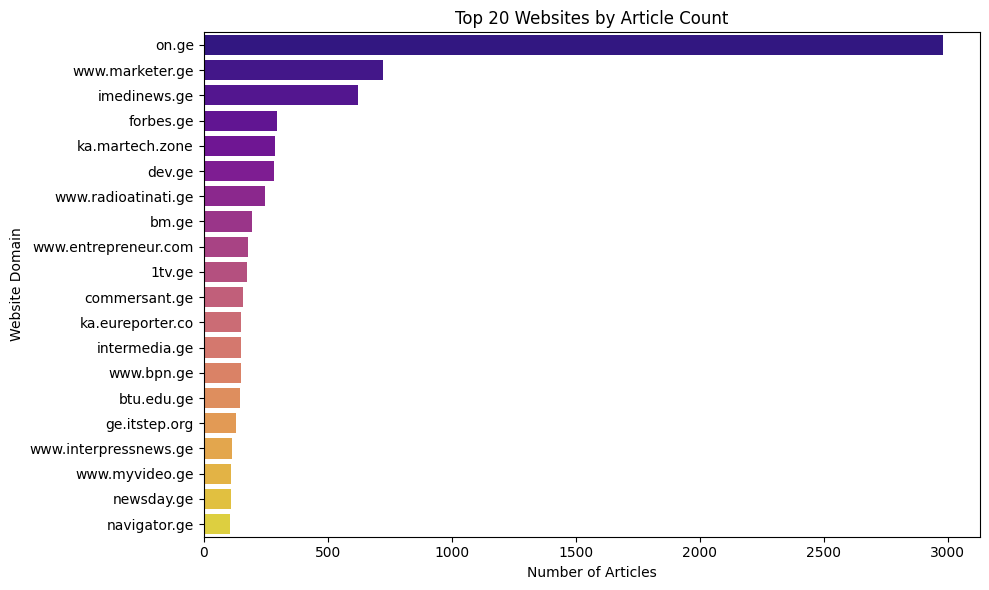

In [4]:
article_df = article_counts.reset_index()
article_df.columns = ['domain', 'count']
top20_df = article_df.head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top20_df, y='domain', x='count', palette='plasma')
plt.title('Top 20 Websites by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Website Domain')
plt.tight_layout()
plt.show()

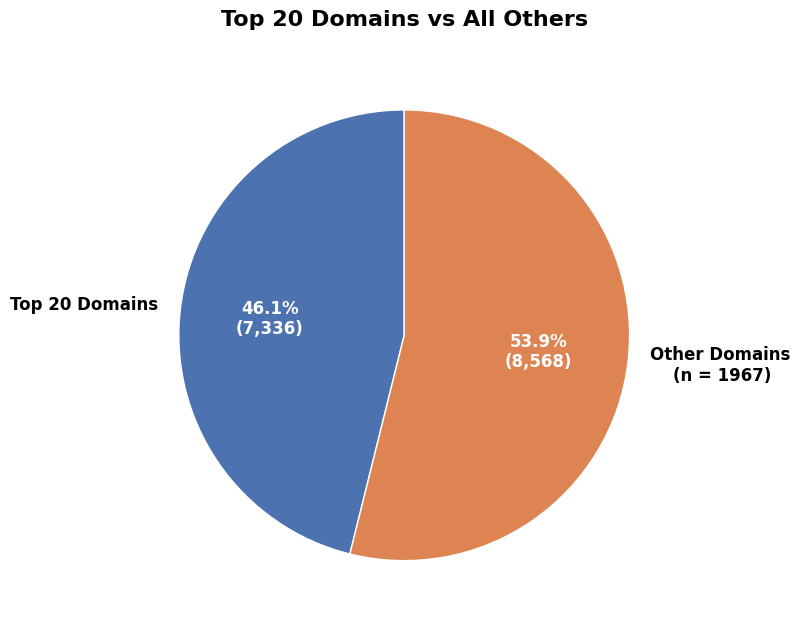

In [ ]:
# Calculate total articles per domain to split into top/bottom halves
total_articles_per_domain = df['domain'].value_counts()
n_domains = len(total_articles_per_domain)
top_20_total = total_articles_per_domain.head(20).sum()
others_total = total_articles_per_domain.iloc[20:].sum()

# Combine top 20 and "Other" into one Series
num_other_domains = len(total_articles_per_domain) - 20

# Build new pie data with label
pie_data = {
    f'Top 20 Domains': top_20_total,
    f'Other Domains\n    (n = {num_other_domains})': others_total
}


colors = ['#4C72B0', '#DD8452']  # blue and orange


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'  # comma as thousands separator
    return my_autopct

# Updated pie chart plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    pie_data.values(),
    labels=pie_data.keys(),
    autopct=make_autopct(pie_data.values()),
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Top 20 Domains vs All Others', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()